### Project Schwarz IT Bulgaria

Start date: 16.09.2021  
End date: 22.09.2021  
Candidate: Angel Jirov  

Official Data Set Link:
https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

***

**Project Objectives (provided by Schwarz IT):**

**General:**
You can use any programming language for this assignment (e.g. Java, Scala, Python)
We don't expect you to spin up any costly machines in the cloud or elsewhere to process Gigabytes or Terabytes of data!
Unless stated otherwise, you can use any analytics toolstack, however keep the following point in mind.
The solution should be flexible and scalable as well as ensure a good code quality (We want to take this use case into production)

##### Assignment
                                          

**Ingestion:** 
Load one of the datasets from below onto your laptop or any other system (e.g. HDFS, Database, etc.). Keep it simple, only load as much data as you can process with your system of choice (e.g. load a week or month worth of data). 
Download a weather dataset for the same timeframe as the above dataset, so that you can later join the two datasets

**Preparation/Data Cleansing:** How can we ensure quality of the data? What checks could be implemented? Implement a simple method to ensure the date/timestamp is in the right format throughout the datasets.

**Processing:** 
Join the two datasets, so that we know the weather for each entry in the main dataset.

**Analysis & Visualization:**
Run analysis of your choice on the data and visualize the results (e.g. table, chart, map, etc.). Here are some ideas for the analysis part:
Impact of weather on the ridership of taxis, bikes, etc.
How many customers per day, hour or weekday?
***

#### Dataset Information  
The yellow and green taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data

#### Data Dictionary and MetaData

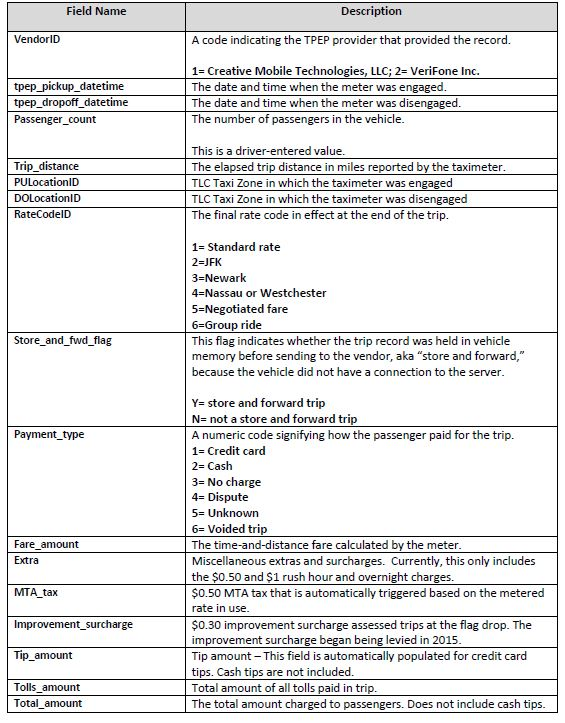

#### Resources used:
* https://github.com/encoder-90/ds_projects/blob/main/project_mushroom/Mushroom%20Dataset.ipynb
* https://github.com/encoder-90/ds_projects/blob/main/project_pharmacy/Pharmacy%20ADS%20Notebook.ipynb
* https://github.com/encoder-90/ds_projects/tree/main/project_alva
* https://towardsdatascience.com/a-straightforward-guide-to-cleaning-and-preparing-data-in-python-8c82f209ae33
* https://www.weather.gov/wrh/climate?wfo=okx
* https://ingmarschumacher.com/2013/10/11/climate-departure-means/

#### Code snippets used:
* https://stackoverflow.com/questions/43214204/how-do-i-tell-if-a-column-in-a-pandas-dataframe-is-of-type-datetime-how-do-i-te  
* https://stackoverflow.com/questions/38151382/celsius-to-fahrenheit-conversion-in-csv-file 
* https://stackoverflow.com/questions/16176996/keep-only-date-part-when-using-pandas-to-datetime
* http://www.pygal.org/en/stable/documentation/types/solidgauge.html
* https://stackoverflow.com/questions/22923775/calculate-time-difference-between-two-pandas-columns-in-hours-and-minutes  
* https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars  
* https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html  
  

#### Assupmtions:
* The pickup date and drop off date are on the same day
* One cab can not have more than 7 passengers for a trip
* Max trip duration limit is set to 200 min
* Rate code is categorized from 1 to 6

In [29]:
# Import libraries
import pygal # pip install pygal
import pandas as pd
import pandas_profiling
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from IPython.display import Markdown, display, SVG

In [2]:
# Option to show all the DataFrame columns
pd.options.display.max_columns = None

# Ignore competability warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

In [4]:
# Load yellow taxi csv dataset using pandas
data = pd.read_csv("yellow_tripdata_2014-02.csv")

# Start with basic analysis to understand the volume and type of data
display(Markdown('---'))
print("Dataset Size - (Row, Columns): "+ str(data.shape))
display(Markdown('---'))
print("----------------------Data types-----------------------------")
print(data.info())
display(Markdown('---'))
print("----------------------Basic Statistics-----------------------")
print(data.describe())

---

Dataset Size - (Row, Columns): (13063791, 18)


---

----------------------Data types-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13063791 entries, 0 to 13063790
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   vendor_id            object 
 1    pickup_datetime     object 
 2    dropoff_datetime    object 
 3    passenger_count     int64  
 4    trip_distance       float64
 5    pickup_longitude    float64
 6    pickup_latitude     float64
 7    rate_code           int64  
 8    store_and_fwd_flag  object 
 9    dropoff_longitude   float64
 10   dropoff_latitude    float64
 11   payment_type        object 
 12   fare_amount         float64
 13   surcharge           float64
 14   mta_tax             float64
 15   tip_amount          float64
 16   tolls_amount        float64
 17   total_amount        float64
dtypes: float64(11), int64(2), object(5)
memory usage: 1.8+ GB
None


---

----------------------Basic Statistics-----------------------
        passenger_count   trip_distance   pickup_longitude   pickup_latitude  \
count      1.306379e+07    1.306379e+07       1.306379e+07      1.306379e+07   
mean       1.696670e+00    2.780515e+00      -7.286653e+01      4.013946e+01   
std        1.369887e+00    3.259234e+00       8.994963e+00      4.954971e+00   
min        0.000000e+00    0.000000e+00      -1.067029e+02      0.000000e+00   
25%        1.000000e+00    1.000000e+00      -7.399233e+01      4.073482e+01   
50%        1.000000e+00    1.700000e+00      -7.398216e+01      4.075238e+01   
75%        2.000000e+00    3.100000e+00      -7.396806e+01      4.076662e+01   
max        2.080000e+02    1.000000e+02       1.699728e+02      6.633160e+01   

          rate_code   dropoff_longitude   dropoff_latitude   fare_amount  \
count  1.306379e+07        1.306379e+07       1.306379e+07  1.306379e+07   
mean   1.031066e+00       -7.278278e+01       4.009459e+01  1.207

In [5]:
# Load weather xlsx into a DataFrame using pandas
# Heating degree days (HDD) 
# Cooling degree days (CDD)
# When we talk about precipitation, we are talking about water that is falling out of the sky,
# this could be rain, drizzle, snow, sleet, hail or something rarer
# A city hits "climate departure" when the average temperature of its coolest year from then
# on is projected to be warmer than
weather = pd.read_excel('NY2014Data.xlsx')
weather.head(3)

,Date,Maximum,Minimum,Average,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2014-02-01,41,28,34.5,3.4,30,0,0.00,0.0,1
1,2014-02-02,49,32,40.5,9.3,24,0,0.00,0.0,0
2,2014-02-03,41,27,34.0,2.7,31,0,0.65,6.7,1


In [6]:
# For our convenience lets convert Fahrenheit to Celsius
weather["Maximum_C"] = fahr_to_celsius(weather["Maximum"])
weather["Minimum_C"] = fahr_to_celsius(weather["Minimum"])
weather["Average_C"] = fahr_to_celsius(weather["Average"])
weather.drop(['Maximum', 'Minimum', 'Average'], axis = 1, inplace = True)
weather.head(3)

,Date,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth,Maximum_C,Minimum_C,Average_C
0,2014-02-01,3.4,30,0,0.00,0.0,1,5.000000,-2.222222,1.388889
1,2014-02-02,9.3,24,0,0.00,0.0,0,9.444444,0.000000,4.722222
2,2014-02-03,2.7,31,0,0.65,6.7,1,5.000000,-2.777778,1.111111


In [7]:
# Typecast column to datetime
weather['date_time'] = pd.to_datetime(weather['Date'])
weather.head(3)

,Date,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth,Maximum_C,Minimum_C,Average_C,date_time
0,2014-02-01,3.4,30,0,0.00,0.0,1,5.000000,-2.222222,1.388889,2014-02-01
1,2014-02-02,9.3,24,0,0.00,0.0,0,9.444444,0.000000,4.722222,2014-02-02
2,2014-02-03,2.7,31,0,0.65,6.7,1,5.000000,-2.777778,1.111111,2014-02-03


In [8]:
# We need to see the top 3 rows to check if the header and indexes are right
data.head(3)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2014-02-09 14:51:00,2014-02-09 14:58:00,1,1.06,-73.982370,40.768287,1,NaN,-73.977575,40.758175,CSH,6.5,0.0,0.5,0.0,0.0,7.0
1,VTS,2014-02-06 14:27:00,2014-02-06 14:44:00,2,1.48,-73.983070,40.764430,1,NaN,-73.993750,40.750330,CRD,11.0,0.0,0.5,1.0,0.0,12.5
2,VTS,2014-02-06 14:22:00,2014-02-06 14:45:00,1,2.84,-74.002667,40.723770,1,NaN,-73.982272,40.757965,CRD,15.5,0.0,0.5,3.1,0.0,19.1


In [9]:
# Check for missing values
data.isnull().sum()

vendor_id                    0
 pickup_datetime             0
 dropoff_datetime            0
 passenger_count             0
 trip_distance               0
 pickup_longitude            0
 pickup_latitude             0
 rate_code                   0
 store_and_fwd_flag    6664978
 dropoff_longitude           0
 dropoff_latitude            0
 payment_type                0
 fare_amount                 0
 surcharge                   0
 mta_tax                     0
 tip_amount                  0
 tolls_amount                0
 total_amount                0
dtype: int64

In [10]:
# % of rows missing in each column
for column in data.columns:
    percentage = data[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

vendor_id: 0.0%
 pickup_datetime: 0.0%
 dropoff_datetime: 0.0%
 passenger_count: 0.0%
 trip_distance: 0.0%
 pickup_longitude: 0.0%
 pickup_latitude: 0.0%
 rate_code: 0.0%
 store_and_fwd_flag: 51.02%
 dropoff_longitude: 0.0%
 dropoff_latitude: 0.0%
 payment_type: 0.0%
 fare_amount: 0.0%
 surcharge: 0.0%
 mta_tax: 0.0%
 tip_amount: 0.0%
 tolls_amount: 0.0%
 total_amount: 0.0%


In [11]:
# We need to remove blank spaces in column names
print(data.columns)
data.columns = data.columns.str.strip()
print(data.columns)

Index(['vendor_id', ' pickup_datetime', ' dropoff_datetime',
       ' passenger_count', ' trip_distance', ' pickup_longitude',
       ' pickup_latitude', ' rate_code', ' store_and_fwd_flag',
       ' dropoff_longitude', ' dropoff_latitude', ' payment_type',
       ' fare_amount', ' surcharge', ' mta_tax', ' tip_amount',
       ' tolls_amount', ' total_amount'],
      dtype='object')
Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'rate_code',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')


[nan 'N' 'Y']
N    6253634
Y     145179
Name: store_and_fwd_flag, dtype: int64


<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='count'>

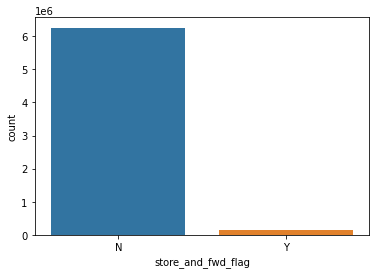

In [12]:
# Lets investigate the column store_and_fwd_flag to know the value distribution if we want to use it later
values_store_and_fwd = data['store_and_fwd_flag'].unique()
print(values_store_and_fwd)
print(data['store_and_fwd_flag'].value_counts())
sns.countplot(data["store_and_fwd_flag"])

In [13]:
# Old
print(data.pickup_datetime.dtype)
print(data.dropoff_datetime.dtype)
# Typecast the pickup and dropoff columns to datetime
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])
# New
print(data.pickup_datetime.dtype)
print(data.dropoff_datetime.dtype)

object
object
datetime64[ns]
datetime64[ns]


In [14]:
# Get only the date, so we can join with weather
data['pickup_day'] = data['pickup_datetime'].dt.date
data['dropoff_day'] = data['dropoff_datetime'].dt.date
data['pickup_day'] = pd.to_datetime(data['pickup_day'])
data['dropoff_day'] = pd.to_datetime(data['dropoff_day'])
data.head(3)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_day,dropoff_day
0,VTS,2014-02-09 14:51:00,2014-02-09 14:58:00,1,1.06,-73.982370,40.768287,1,NaN,-73.977575,40.758175,CSH,6.5,0.0,0.5,0.0,0.0,7.0,2014-02-09,2014-02-09
1,VTS,2014-02-06 14:27:00,2014-02-06 14:44:00,2,1.48,-73.983070,40.764430,1,NaN,-73.993750,40.750330,CRD,11.0,0.0,0.5,1.0,0.0,12.5,2014-02-06,2014-02-06
2,VTS,2014-02-06 14:22:00,2014-02-06 14:45:00,1,2.84,-74.002667,40.723770,1,NaN,-73.982272,40.757965,CRD,15.5,0.0,0.5,3.1,0.0,19.1,2014-02-06,2014-02-06


In [15]:
# Merge the two dataframes
data_merge = pd.merge(data, weather, how='inner', left_on='pickup_day', right_on='date_time')
data_merge.head(3)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_day,dropoff_day,Date,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth,Maximum_C,Minimum_C,Average_C,date_time
0,VTS,2014-02-09 14:51:00,2014-02-09 14:58:00,1,1.06,-73.982370,40.768287,1,NaN,-73.977575,40.758175,CSH,6.5,0.0,0.5,0.0,0.0,7.0,2014-02-09,2014-02-09,2014-02-09,-10.0,43,0,0.12,1.4,10,-1.666667,-9.444444,-5.555556,2014-02-09
1,VTS,2014-02-09 14:56:00,2014-02-09 15:02:00,1,1.14,-73.955147,40.769680,1,NaN,-73.967633,40.762965,CSH,6.0,0.0,0.5,0.0,0.0,6.5,2014-02-09,2014-02-09,2014-02-09,-10.0,43,0,0.12,1.4,10,-1.666667,-9.444444,-5.555556,2014-02-09
2,VTS,2014-02-09 14:57:00,2014-02-09 15:01:00,1,0.92,-73.962105,40.767960,1,NaN,-73.955045,40.779402,CRD,5.0,0.0,0.5,1.0,0.0,6.5,2014-02-09,2014-02-09,2014-02-09,-10.0,43,0,0.12,1.4,10,-1.666667,-9.444444,-5.555556,2014-02-09


In [16]:
# New column for the duration of the trip in minutes
data_merge['time_diff'] = (data_merge.dropoff_datetime-data_merge.pickup_datetime).astype('timedelta64[m]')

In [17]:
# Filter passenger count as we made the assumption that one cab can not have more than 7 passengers
data_merge = data_merge.loc[data_merge['passenger_count'] < 8]

# Filter trips with duration more than 200 min
data_merge = data_merge.loc[data_merge['time_diff'] < 200]

# Filter rate codes above 6
data_merge = data_merge.loc[data_merge['rate_code'] < 7]
data_merge.shape

(13063528, 32)

In [18]:
# New column for weekday analysis
data_merge['Weekday_Name'] = data_merge['date_time'].dt.day_name()
data_merge['str_date']=data_merge['Date'].astype(str)
data_merge.head(3)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_day,dropoff_day,Date,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth,Maximum_C,Minimum_C,Average_C,date_time,time_diff,Weekday_Name,str_date
0,VTS,2014-02-09 14:51:00,2014-02-09 14:58:00,1,1.06,-73.982370,40.768287,1,NaN,-73.977575,40.758175,CSH,6.5,0.0,0.5,0.0,0.0,7.0,2014-02-09,2014-02-09,2014-02-09,-10.0,43,0,0.12,1.4,10,-1.666667,-9.444444,-5.555556,2014-02-09,7.0,Sunday,2014-02-09
1,VTS,2014-02-09 14:56:00,2014-02-09 15:02:00,1,1.14,-73.955147,40.769680,1,NaN,-73.967633,40.762965,CSH,6.0,0.0,0.5,0.0,0.0,6.5,2014-02-09,2014-02-09,2014-02-09,-10.0,43,0,0.12,1.4,10,-1.666667,-9.444444,-5.555556,2014-02-09,6.0,Sunday,2014-02-09
2,VTS,2014-02-09 14:57:00,2014-02-09 15:01:00,1,0.92,-73.962105,40.767960,1,NaN,-73.955045,40.779402,CRD,5.0,0.0,0.5,1.0,0.0,6.5,2014-02-09,2014-02-09,2014-02-09,-10.0,43,0,0.12,1.4,10,-1.666667,-9.444444,-5.555556,2014-02-09,4.0,Sunday,2014-02-09


#### Visualizations and Analysis

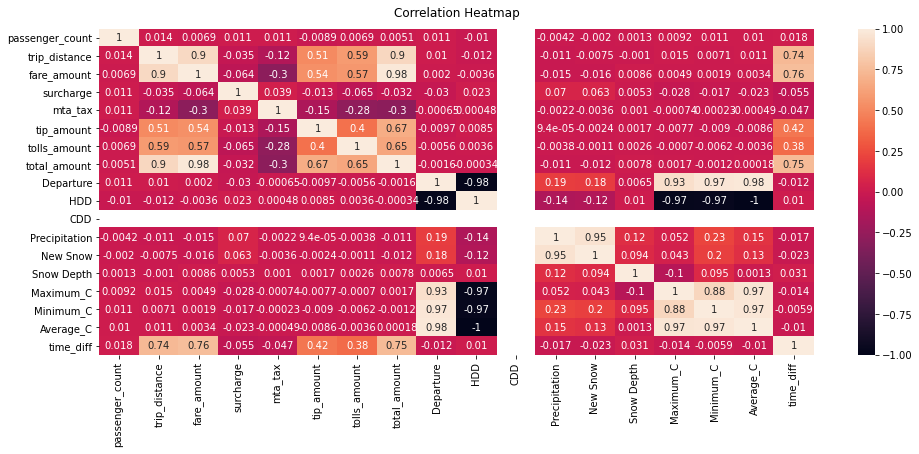

In [19]:
# Create a correlation heatmap to have a better understanding of the relationships between the numerical columns
df_corr = data_merge.copy()
df_corr = df_corr.drop(
 [
 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'rate_code',
 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'pickup_day', 'dropoff_day',
 'Date', 'date_time'
], axis = 1)

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True
# to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [20]:
# Not all relationships are symetrical:
# https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598
# The Predictive Power Score PPS may give us a better understanding
# of the categorical columns and their relationships

# If you dont have the lib - pip install ppscore
import ppscore as pps

df_pps = data_merge.copy()
df_pps = df_pps.drop(
 [
  'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 
  'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
  'tolls_amount', 'total_amount', 'pickup_day', 'dropoff_day', 'Departure', 'HDD', 'CDD', 'Precipitation',
  'New Snow', 'Snow Depth', 'Maximum_C', 'Minimum_C', 'Average_C', 'date_time', 'time_diff'
], axis = 1)

# Create a matrix with all the results
pps_matrix = pps.matrix(df_pps)
pps_matrix

,vendor_id,rate_code,store_and_fwd_flag,payment_type,Date,Weekday_Name,str_date
vendor_id,1.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,7.122227e-03
rate_code,1.463834e-06,1.000000e+00,0.0,1.463834e-06,1.463834e-06,1.463834e-06,1.463834e-06
store_and_fwd_flag,9.193344e-07,9.193344e-07,1.0,9.193344e-07,9.193344e-07,9.193344e-07,9.193344e-07
payment_type,0.000000e+00,0.000000e+00,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Date,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
Weekday_Name,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
str_date,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00,8.021829e-02,1.000000e+00


In [21]:
# If we want to use machine learning later let’s see the data if we do basic outlier filtering for the amount.
print(data_merge.shape)
print(data_merge['total_amount'].quantile(q=0.99))
print(data_merge['total_amount'].quantile(q=0.01))
print(data_merge['total_amount'].describe())

display(Markdown('---'))
filter_data = data_merge[data_merge.total_amount < data_merge['total_amount'].quantile(q=0.99)]
filter_data = filter_data[filter_data.total_amount > filter_data['total_amount'].quantile(q=0.01)]

print(filter_data.shape)
print(filter_data['total_amount'].quantile(q=0.99))
print(filter_data['total_amount'].quantile(q=0.01))
print(filter_data['total_amount'].describe())

(13063528, 34)
67.0
4.0
count    1.306353e+07
mean     1.459965e+01
std      1.196171e+01
min      2.500000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.625000e+01
max      5.500000e+02
Name: total_amount, dtype: float64


---

(12792690, 34)
57.83
4.5
count    1.279269e+07
mean     1.406316e+01
std      9.837383e+00
min      4.010000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.610000e+01
max      6.699000e+01
Name: total_amount, dtype: float64


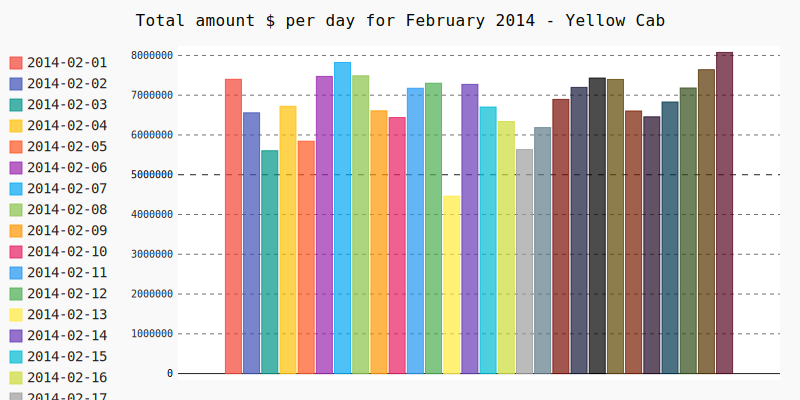

In [22]:
# We use pygal as the format can be saved as svg and later embedded in the HTML for making (web) report interactive
by_total_amt = data_merge.groupby('str_date')['total_amount'].sum()

bar_chart = pygal.Bar(height=400)
bar_chart.title = 'Total amount $ per day for February 2014 - Yellow Cab'
[bar_chart.add(x[0], x[1]) for x in by_total_amt.items()]
display(SVG(bar_chart.render(disable_xml_declaration=True)))
# Save the chart and open it the browser for interactive visualization
# bar_chart.render_to_file('bar_chart_amt_days.svg')

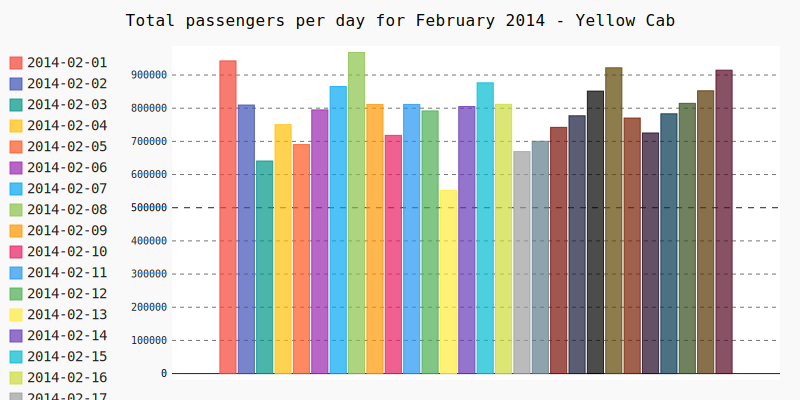

In [23]:
by_passengers_count = data_merge.groupby('str_date')['passenger_count'].sum()

bar_chart = pygal.Bar(height=400)
bar_chart.title = 'Total passengers per day for February 2014 - Yellow Cab'
[bar_chart.add(x[0], x[1]) for x in by_passengers_count.items()]

display(SVG(bar_chart.render(disable_xml_declaration=True)))
# Save the chart and open it the browser for interactive visualization
# bar_chart.render_to_file('bar_chart_pass_count.svg')

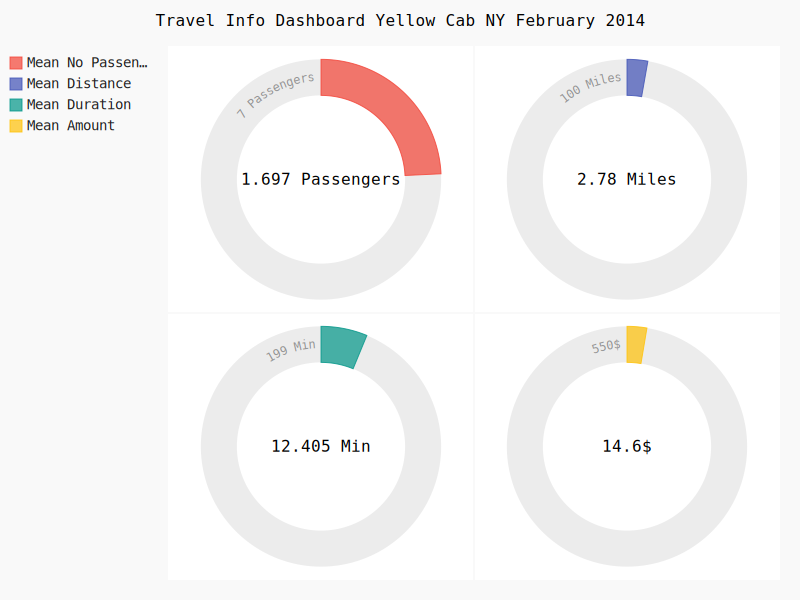

In [24]:
mean_dist_feb = round(data_merge["trip_distance"].mean(), 3)
max_dist_feb = data_merge["trip_distance"].max()

mean_pass_feb = round(data_merge["passenger_count"].mean(), 3)
max_pass_feb = data_merge["passenger_count"].max()

mean_trip_feb = round(data_merge["time_diff"].mean(), 3)
max_trip_feb = data_merge["time_diff"].max()

mean_amt_feb = round(data_merge["total_amount"].mean(), 3)
max_amt_feb = data_merge["total_amount"].max()

gauge = pygal.SolidGauge(inner_radius=0.70)
gauge.title = 'Travel Info Dashboard Yellow Cab NY February 2014 '
percent_formatter = lambda x: '{:.10g}%'.format(x)
dollar_formatter = lambda x: '{:.10g}$'.format(x)
miles_formatter = lambda x: '{:.10g} Miles'.format(x)
pass_formatter = lambda x: '{:.10g} Passengers'.format(x)
min_formatter = lambda x: '{:.10g} Min'.format(x)
gauge.value_formatter = percent_formatter

gauge.add('Mean No Passengers', [{'value': mean_pass_feb, 'max_value': max_pass_feb}],
          formatter=pass_formatter)
gauge.add('Mean Distance', [{'value': mean_dist_feb, 'max_value': max_dist_feb}],
         formatter=miles_formatter)
gauge.add('Mean Duration', [{'value':mean_trip_feb, 'max_value': max_trip_feb}],
         formatter=min_formatter)
gauge.add('Mean Amount', [{'value':mean_amt_feb, 'max_value': max_amt_feb}],
         formatter=dollar_formatter)

display(SVG(gauge.render(disable_xml_declaration=True)))
# Save the chart and open it the browser for interactive visualization
# gauge.render_to_file('gauge_chart_feb_2014.svg')

In [25]:
# New dataframe for days of the week analysis

df_weekday_pass = data_merge.groupby('Weekday_Name')['passenger_count'].sum().to_frame().reset_index()
df_weekday_amt = data_merge.groupby('Weekday_Name')['total_amount'].sum().to_frame().reset_index()
df_weekday_temp = data_merge.groupby('Weekday_Name')['Average_C'].mean().to_frame().reset_index()
df_weekday_trip_avg = data_merge.groupby('Weekday_Name')['trip_distance'].mean().to_frame().reset_index()
df_weekday_trip_avg.rename(columns = {'trip_distance':'trip_dist_avg'}, inplace = True)
df_weekday_trip_sum = data_merge.groupby('Weekday_Name')['trip_distance'].sum().to_frame().reset_index()
df_weekday_trip_sum.rename(columns = {'trip_distance':'trip_dist_sum'}, inplace = True)

df_weekday_amt_pass = pd.merge(df_weekday_pass, df_weekday_amt, how='inner',
                               left_on='Weekday_Name', right_on='Weekday_Name')
df_weekday_temp = pd.merge(df_weekday_temp, df_weekday_amt_pass, how='inner',
                          left_on='Weekday_Name', right_on='Weekday_Name')
df_weekday_trip_avg = pd.merge(df_weekday_temp, df_weekday_trip_avg, how='inner',
                               left_on='Weekday_Name', right_on='Weekday_Name')
df_weekday_trip_sum = pd.merge(df_weekday_trip_avg, df_weekday_trip_sum, how='inner',
                               left_on='Weekday_Name', right_on='Weekday_Name')
df_weekday_trip_sum

,Weekday_Name,Average_C,passenger_count,total_amount,trip_dist_avg,trip_dist_sum
0,Friday,-1.320295,3436804,3.060209e+07,2.780790,5.651350e+06
1,Monday,-2.093651,2753539,2.412937e+07,2.873012,4.739318e+06
2,Saturday,-0.258051,3709213,2.898547e+07,2.699988,5.662339e+06
3,Sunday,-0.173650,3203139,2.610410e+07,2.958088,5.414712e+06
4,Thursday,-1.885294,2976805,2.677339e+07,2.768115,4.936391e+06
5,Tuesday,-4.332748,3045284,2.690789e+07,2.713543,4.981528e+06
6,Wednesday,-2.550211,3039392,2.722062e+07,2.690240,4.936300e+06


In [26]:
# Reindex and visualize the data
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday = df_weekday_trip_sum.groupby(['Weekday_Name']).sum().reindex(cats).reset_index()
df_weekday

,Weekday_Name,Average_C,passenger_count,total_amount,trip_dist_avg,trip_dist_sum
0,Monday,-2.093651,2753539,2.412937e+07,2.873012,4.739318e+06
1,Tuesday,-4.332748,3045284,2.690789e+07,2.713543,4.981528e+06
2,Wednesday,-2.550211,3039392,2.722062e+07,2.690240,4.936300e+06
3,Thursday,-1.885294,2976805,2.677339e+07,2.768115,4.936391e+06
4,Friday,-1.320295,3436804,3.060209e+07,2.780790,5.651350e+06
5,Saturday,-0.258051,3709213,2.898547e+07,2.699988,5.662339e+06
6,Sunday,-0.173650,3203139,2.610410e+07,2.958088,5.414712e+06


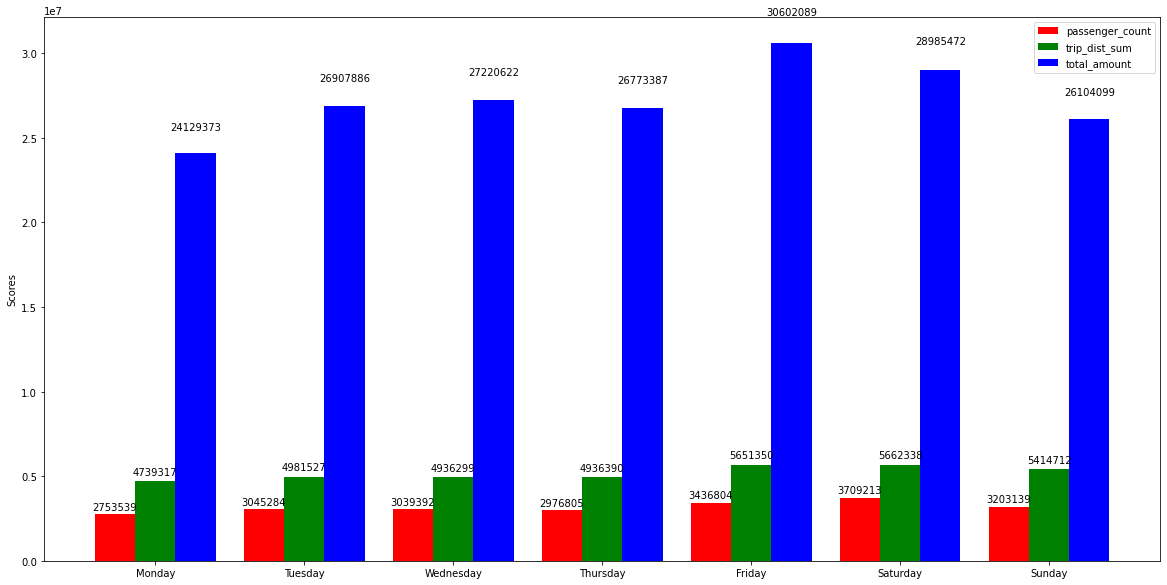

In [27]:
N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

yvals = df_weekday['passenger_count'].values
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = df_weekday['trip_dist_sum'].values
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = df_weekday['total_amount'].values
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('passenger_count', 'trip_dist_sum', 'total_amount') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

Based on the visualized weekday data we can make the observation that the travel with yellow cabs increases during Friday and Saturday and drop significantly on Monday. Also on Friday, Saturday, and Sunday the travel distance increases. The number of passengers is the lowest on Monday and Thursday

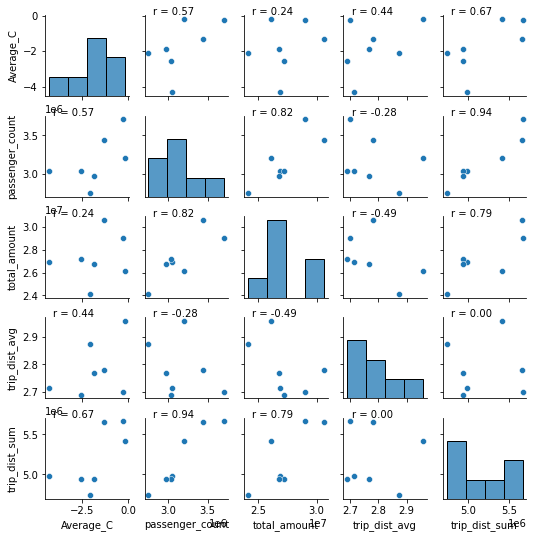

In [30]:
# Add correlation coefficient and plot the new dataframe
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r), xy=(0.1, 1.0), xycoords=ax.transAxes)

pair_plot = sns.pairplot(df_weekday, size=1.5)
pair_plot.map_lower(corrfunc)
pair_plot.map_upper(corrfunc)

One of the conclusions from this analysis that can be derived from the visualization is that the total amount
is correlated with the number of passengers and the number of passengers is correlated with the total traveled
distance. Both statements are self-explanatory. In addition, we can observe a positive correlation between the Average Temp and the total Travel Distance. To confirm this later we will make this analysis on a daily basis.

In [31]:
# New dataframe for days of the month analysis
df_day_pass = data_merge.groupby('str_date')['passenger_count'].sum().to_frame().reset_index()
df_day_amt = data_merge.groupby('str_date')['total_amount'].sum().to_frame().reset_index()
df_day_temp = data_merge.groupby('str_date')['Average_C'].mean().to_frame().reset_index()
df_day_trip_avg = data_merge.groupby('str_date')['trip_distance'].mean().to_frame().reset_index()
df_day_trip_avg.rename(columns = {'trip_distance':'trip_dist_avg'}, inplace = True)
df_day_trip_sum = data_merge.groupby('str_date')['trip_distance'].sum().to_frame().reset_index()
df_day_trip_sum.rename(columns = {'trip_distance':'trip_dist_sum'}, inplace = True)

df_day_amt_pass = pd.merge(df_day_pass, df_day_amt, how='inner',
                           left_on='str_date', right_on='str_date')
df_day_temp = pd.merge(df_day_temp, df_day_amt_pass, how='inner',
                       left_on='str_date', right_on='str_date')
df_day_trip_avg = pd.merge(df_day_temp, df_day_trip_avg, how='inner',
                           left_on='str_date', right_on='str_date')
df_day_trip_sum = pd.merge(df_day_trip_avg, df_day_trip_sum, how='inner',
                           left_on='str_date', right_on='str_date')
df_day_trip_sum

,str_date,Average_C,passenger_count,total_amount,trip_dist_avg,trip_dist_sum
0,2014-02-01,1.388889,942659,7.399050e+06,2.668298,1424270.58
1,2014-02-02,4.722222,809643,6.556657e+06,2.937861,1363808.08
2,2014-02-03,1.111111,640909,5.603781e+06,2.876331,1100213.70
3,2014-02-04,-2.777778,750361,6.720426e+06,2.749839,1249590.13
4,2014-02-05,-0.555556,690377,5.843230e+06,2.563809,1061014.42
5,2014-02-06,-3.888889,794905,7.473036e+06,2.805601,1343260.27
6,2014-02-07,-2.777778,865279,7.823120e+06,2.754624,1410921.35
7,2014-02-08,-5.000000,968150,7.487639e+06,2.613510,1437323.52
8,2014-02-09,-5.555556,811378,6.606938e+06,2.921140,1362667.85
9,2014-02-10,-5.555556,718126,6.437968e+06,2.781198,1212324.09


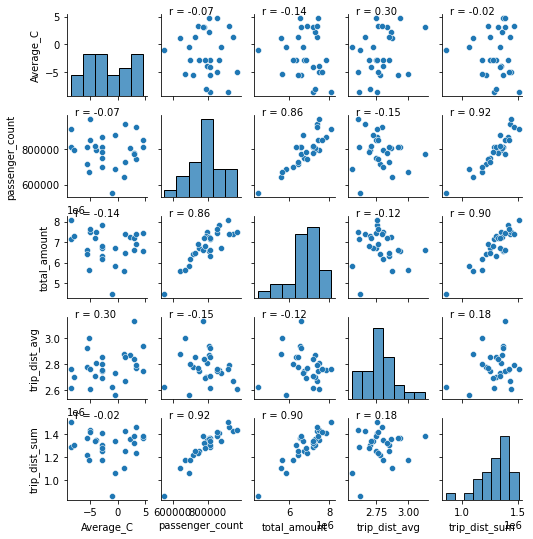

In [32]:
"""
Based on the daily analysis we can not confirm that the average temperature is correlated with the travel distance.
"""
pair_plot_day = sns.pairplot(df_day_trip_sum, size=1.5)
pair_plot_day.map_lower(corrfunc)
pair_plot_day.map_upper(corrfunc)

In [33]:
# If you dont have the lib - pip install ppscore
import ppscore as pps

# Create a matrix with all the results
pps_matrix = pps.matrix(df_day_trip_sum)
pps_matrix

,str_date,Average_C,passenger_count,total_amount,trip_dist_avg,trip_dist_sum
str_date,1,0,0.000000,0.000000,0,0.000000
Average_C,0,1,0.000000,0.000000,0,0.000000
passenger_count,0,0,1.000000,0.000000,0,0.425998
total_amount,0,0,0.226657,1.000000,0,0.170594
trip_dist_avg,0,0,0.000000,0.000000,1,0.000000
trip_dist_sum,0,0,0.367614,0.239566,0,1.000000


In [34]:
data_merge.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_day,dropoff_day,Date,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth,Maximum_C,Minimum_C,Average_C,date_time,time_diff,Weekday_Name,str_date
0,VTS,2014-02-09 14:51:00,2014-02-09 14:58:00,1,1.06,-73.982370,40.768287,1,NaN,-73.977575,40.758175,CSH,6.5,0.0,0.5,0.0,0.0,7.0,2014-02-09,2014-02-09,2014-02-09,-10.0,43,0,0.12,1.4,10,-1.666667,-9.444444,-5.555556,2014-02-09,7.0,Sunday,2014-02-09
1,VTS,2014-02-09 14:56:00,2014-02-09 15:02:00,1,1.14,-73.955147,40.769680,1,NaN,-73.967633,40.762965,CSH,6.0,0.0,0.5,0.0,0.0,6.5,2014-02-09,2014-02-09,2014-02-09,-10.0,43,0,0.12,1.4,10,-1.666667,-9.444444,-5.555556,2014-02-09,6.0,Sunday,2014-02-09
2,VTS,2014-02-09 14:57:00,2014-02-09 15:01:00,1,0.92,-73.962105,40.767960,1,NaN,-73.955045,40.779402,CRD,5.0,0.0,0.5,1.0,0.0,6.5,2014-02-09,2014-02-09,2014-02-09,-10.0,43,0,0.12,1.4,10,-1.666667,-9.444444,-5.555556,2014-02-09,4.0,Sunday,2014-02-09
3,VTS,2014-02-09 14:40:00,2014-02-09 14:59:00,1,2.12,-73.981767,40.778738,1,NaN,-73.992092,40.750042,CSH,13.0,0.0,0.5,0.0,0.0,13.5,2014-02-09,2014-02-09,2014-02-09,-10.0,43,0,0.12,1.4,10,-1.666667,-9.444444,-5.555556,2014-02-09,19.0,Sunday,2014-02-09
4,VTS,2014-02-09 14:51:00,2014-02-09 14:57:00,1,1.40,-73.971507,40.763702,1,NaN,-73.955572,40.773677,CSH,7.0,0.0,0.5,0.0,0.0,7.5,2014-02-09,2014-02-09,2014-02-09,-10.0,43,0,0.12,1.4,10,-1.666667,-9.444444,-5.555556,2014-02-09,6.0,Sunday,2014-02-09


In [35]:
# Create a new column for the pickup hour
data_merge['hour_int'] = data_merge['pickup_datetime'].dt.hour
data_merge.head(3)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_day,dropoff_day,Date,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth,Maximum_C,Minimum_C,Average_C,date_time,time_diff,Weekday_Name,str_date,hour_int
0,VTS,2014-02-09 14:51:00,2014-02-09 14:58:00,1,1.06,-73.982370,40.768287,1,NaN,-73.977575,40.758175,CSH,6.5,0.0,0.5,0.0,0.0,7.0,2014-02-09,2014-02-09,2014-02-09,-10.0,43,0,0.12,1.4,10,-1.666667,-9.444444,-5.555556,2014-02-09,7.0,Sunday,2014-02-09,14
1,VTS,2014-02-09 14:56:00,2014-02-09 15:02:00,1,1.14,-73.955147,40.769680,1,NaN,-73.967633,40.762965,CSH,6.0,0.0,0.5,0.0,0.0,6.5,2014-02-09,2014-02-09,2014-02-09,-10.0,43,0,0.12,1.4,10,-1.666667,-9.444444,-5.555556,2014-02-09,6.0,Sunday,2014-02-09,14
2,VTS,2014-02-09 14:57:00,2014-02-09 15:01:00,1,0.92,-73.962105,40.767960,1,NaN,-73.955045,40.779402,CRD,5.0,0.0,0.5,1.0,0.0,6.5,2014-02-09,2014-02-09,2014-02-09,-10.0,43,0,0.12,1.4,10,-1.666667,-9.444444,-5.555556,2014-02-09,4.0,Sunday,2014-02-09,14


In [36]:
# New dataframe for hours of the month analysis
df_h_pass = data_merge.groupby('hour_int')['passenger_count'].sum().to_frame().reset_index()
df_h_amt = data_merge.groupby('hour_int')['total_amount'].sum().to_frame().reset_index()
df_h_temp = data_merge.groupby('hour_int')['Average_C'].mean().to_frame().reset_index()
df_h_trip_avg = data_merge.groupby('hour_int')['trip_distance'].mean().to_frame().reset_index()
df_h_trip_avg.rename(columns = {'trip_distance':'trip_dist_avg'}, inplace = True)
df_h_trip_sum = data_merge.groupby('hour_int')['trip_distance'].sum().to_frame().reset_index()
df_h_trip_sum.rename(columns = {'trip_distance':'trip_dist_sum'}, inplace = True)

df_h_amt_pass = pd.merge(df_h_pass, df_h_amt, how='inner',
                           left_on='hour_int', right_on='hour_int')
df_h_temp = pd.merge(df_h_temp, df_h_amt_pass, how='inner',
                       left_on='hour_int', right_on='hour_int')
df_h_trip_avg = pd.merge(df_h_temp, df_h_trip_avg, how='inner',
                           left_on='hour_int', right_on='hour_int')
df_h_trip_sum = pd.merge(df_h_trip_avg, df_h_trip_sum, how='inner',
                           left_on='hour_int', right_on='hour_int')
df_h_trip_sum

,hour_int,Average_C,passenger_count,total_amount,trip_dist_avg,trip_dist_sum
0,0,-1.271105,888508,7.795235e+06,3.202806,1623537.74
1,1,-1.053868,656000,5.615144e+06,3.153668,1182291.09
2,2,-0.869498,498393,4.250081e+06,3.189110,907952.37
3,3,-0.763820,368225,3.252929e+06,3.386699,711985.68
4,4,-0.945160,272193,2.750190e+06,4.026811,631883.21
5,5,-1.570837,215056,2.609346e+06,4.624730,614830.04
6,6,-2.091437,432394,4.139868e+06,3.372385,928582.86
7,7,-2.200097,750533,6.509322e+06,2.778557,1299833.95
8,8,-2.115127,931988,8.003714e+06,2.491298,1426158.32
9,9,-2.001383,971432,8.271507e+06,2.402291,1433139.35


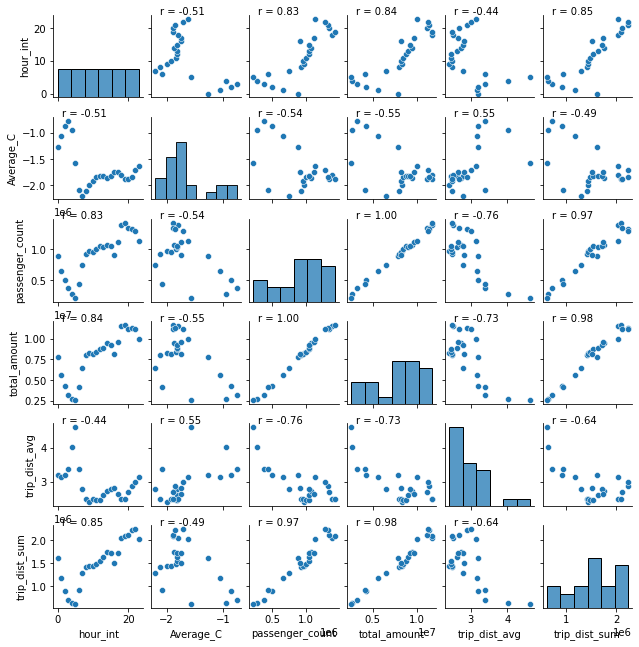

In [37]:
pair_plot_h = sns.pairplot(df_h_trip_sum, size=1.5)
pair_plot_h.map_lower(corrfunc)
pair_plot_h.map_upper(corrfunc)

In [38]:
# If you dont have the lib - pip install ppscore
import ppscore as pps

# Create a matrix with all the results
pps_matrix = pps.matrix(df_h_trip_sum)
pps_matrix

,hour_int,Average_C,passenger_count,total_amount,trip_dist_avg,trip_dist_sum
hour_int,1.000000,0.319444,0.472222,0.444444,0.104167,0.388889
Average_C,0.507397,1.000000,0.000000,0.000000,0.000000,0.000000
passenger_count,0.532831,0.070181,1.000000,0.791384,0.220688,0.653131
total_amount,0.551465,0.063069,0.834356,1.000000,0.203965,0.752145
trip_dist_avg,0.344470,0.000000,0.238566,0.136559,1.000000,0.066650
trip_dist_sum,0.554834,0.000000,0.714978,0.797544,0.150258,1.000000


In [39]:
# Now lets answer the question: What is the preffered way of paying for the service?
df_payment_type = data_merge.groupby('payment_type')['vendor_id'].count().to_frame().reset_index()
Total = df_payment_type['vendor_id'].sum()
df_payment_type["perc_payment"] = df_payment_type["vendor_id"] / Total
df_payment_type

,payment_type,vendor_id,perc_payment
0,CRD,7677066,0.587672
1,CSH,5280422,0.404211
2,DIS,9165,0.000702
3,NOC,31282,0.002395
4,UNK,65593,0.005021


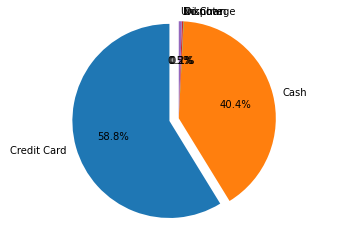

In [40]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Credit Card', 'Cash', 'Dispute', 'No Charge', 'Unknown'
sizes = df_payment_type['perc_payment'].values
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'Credit Card')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
# Same data in Bar Chart
# line_chart = pygal.HorizontalBar()
# line_chart.title = 'Payment methods February 2014 NY Yellow Cabs (in %)'
# sizes = df_payment_type['perc_payment'].values
# sizes = [i * 100 for i in sizes]
# line_chart.add('Credit Card', sizes[0])
# line_chart.add('Cash', sizes[1])
# line_chart.add('Dispute', sizes[2])
# line_chart.add('No Charge', sizes[3])
# line_chart.add('Unknown', sizes[4])

# display(SVG(line_chart.render(disable_xml_declaration=True)))
# Save the chart and open it the browser for interactive visualization
# line_chart.render_to_file('line_chart_payment_feb_2014.svg')

###### What would be the following steps after the initial analysis of the Yellow cab data set for February 2014:  
* The data only for February can provide us with descriptive information. Still, if we want to build a  predictive/prescriptive model we will need to get also the data for the other months of 2014.  
* Once we analyze the data for the whole year we can build a prediction model ex. with XGBoost and predict the number of passengers for a particular day, hour, or weekday in a selected month.
* This can be used by the taxi drivers and companies so they will know when will be the most profitable day, hour, etc. 
  
Thank you for the opportunity. It was a pleasure to do an analysis of a data set after several months as a data engineer.  
